In [61]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np

In [62]:
(X_train , y_train) , ( X_test , y_test) = keras.datasets.mnist.load_data()

In [63]:
len(X_train)

60000

In [64]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

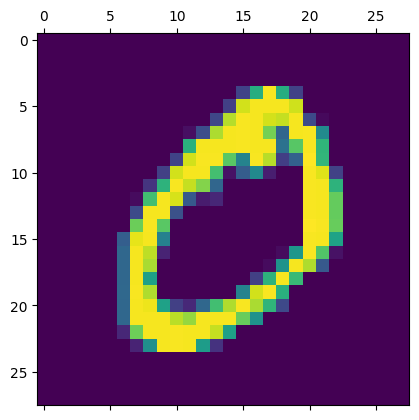

In [65]:
plt.matshow(X_train[1])

In [66]:
y_train[1]

0

### Flatten into 28 * 28 into one dim

In [67]:
X_train.shape

(60000, 28, 28)

### Scalling the values

In [68]:
X_train = X_train/255
X_test = X_test / 255

In [69]:
X_train_flatten  = X_train.reshape(len(X_train) , 28 *28)

In [70]:
X_train_flatten.shape

(60000, 784)

In [71]:
X_test_flatten = X_test.reshape(len(X_test) , 28 * 28)

In [72]:
X_test_flatten.shape

(10000, 784)

In [73]:
model = keras.Sequential([
    # Input layer (784 input units, flattened image)
    keras.layers.Dense(128, input_shape=(784,), activation="relu"),  # First hidden layer
    keras.layers.Dense(64, activation="relu"),  # Second hidden layer
    keras.layers.Dense(32, activation="relu"),  # Third hidden layer
    keras.layers.Dense(10, activation="sigmoid")  # Output layer (10 classes for multi-class classification)
])

model.compile(optimizer="adam" , loss = "sparse_categorical_crossentropy" , metrics= ["accuracy"])

model.fit(X_train_flatten , y_train , epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2624 - accuracy: 0.9228
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1092 - accuracy: 0.9664
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0781 - accuracy: 0.9756
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0603 - accuracy: 0.9811
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0468 - accuracy: 0.9854
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0407 - accuracy: 0.9868
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0326 - accuracy: 0.9898
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0300 - accuracy: 0.9902
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.022

### Evaluvate on Test data set

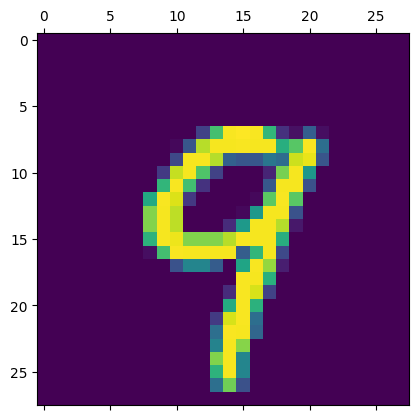

In [75]:
plt.matshow(X_test[12])

In [76]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 967us/step


In [77]:
print(y_predicted[0])

[4.6297265e-04 2.3923295e-03 9.2402738e-01 5.1625627e-01 1.5008822e-04
 8.4209694e-03 6.8114464e-10 1.0000000e+00 4.0016722e-04 4.8753688e-01]


### Based on above oprediction , we need to get the maximum value between theses 10 catagories

In [78]:
np.argmax(y_predicted[12])

9

In [79]:
y_predicted_labels = [ np.argmax(i) for i in y_predicted]

In [80]:
print(y_predicted_labels[: 5])

[7, 2, 1, 0, 4]


In [81]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)

In [82]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    0,    0,    0,    0,    2,    3,    0,    1],
       [   0, 1128,    3,    2,    0,    1,    1,    0,    0,    0],
       [   7,    2,  997,    4,    2,    1,    1,   10,    7,    1],
       [   0,    0,    3,  990,    0,    2,    0,    5,    1,    9],
       [   1,    0,    1,    0,  966,    1,    5,    1,    1,    6],
       [   2,    0,    0,    9,    0,  870,    4,    2,    3,    2],
       [ 138,    2,    0,    1,    3,    6,  808,    0,    0,    0],
       [   1,    3,    3,    2,    0,    0,    1, 1015,    1,    2],
       [   2,    0,    3,   10,    2,    9,    1,    5,  937,    5],
       [   2,    2,    1,    3,    9,    5,    0,    6,    1,  980]])>

### Visualaize 

Text(95.72222222222221, 0.5, 'acutual')

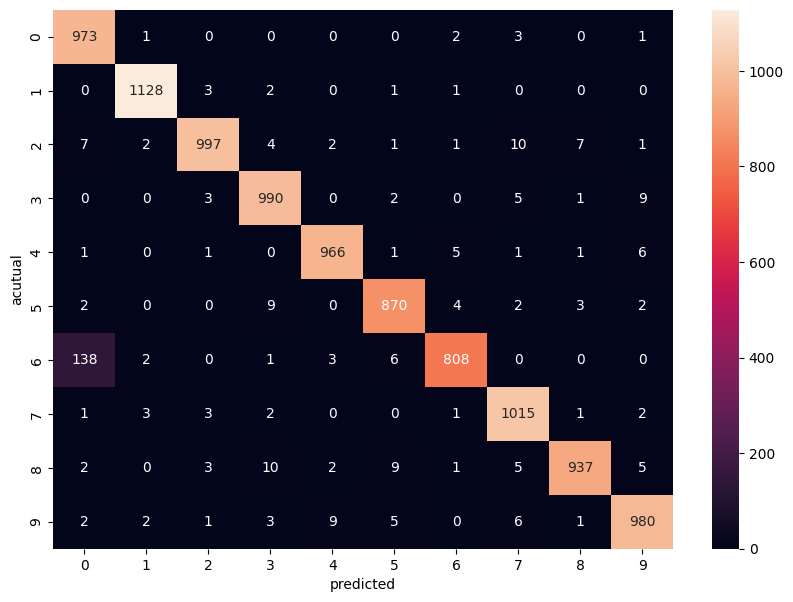

In [83]:
import seaborn as sn 
plt.figure(figsize=(10 , 7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("acutual")